In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
test_train_df = [train_df,test_df]

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


#### Categorical Features 
Survived, Sex, Embarked, Pclass.

#### Numerical Features 
Continous: Age, Fare <br>
Discrete: SibSp, Parch 

Ticket and Cabin are alphanumerical values

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Van der hoef, Mr. Wyckoff",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [10]:
test_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Miles, Mr. Frank",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


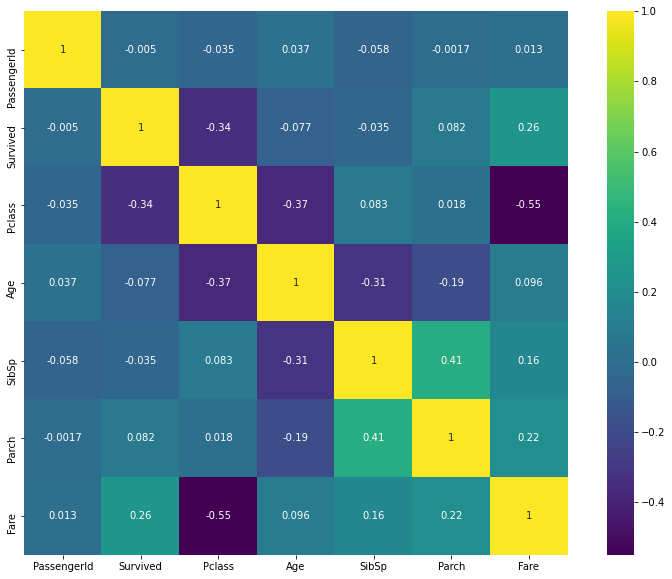

In [11]:
plt.figure(figsize=(14,10))
sns.heatmap(train_df.corr(),annot=True,cmap='viridis',square=True)

#### Analyzing by Pivoting

Analyze our feature correlations by pivoting categorical features against each other

In [12]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Data Visualization

Correlating Numerical Features with Survival

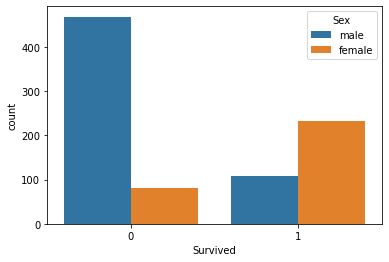

In [16]:
sns.countplot(x='Survived',hue='Sex',data=train_df)

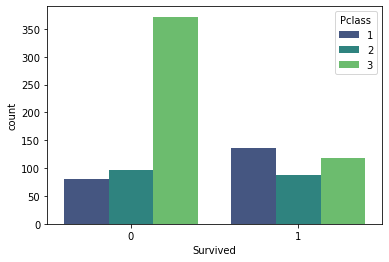

In [17]:
sns.countplot(x='Survived',hue='Pclass',data=train_df,palette='viridis')

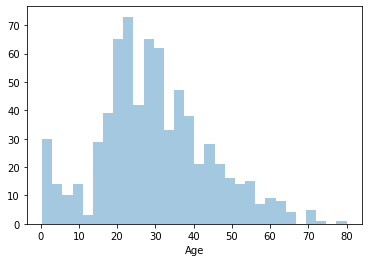

In [18]:
sns.distplot(train_df['Age'].dropna(),bins=30,kde=False)

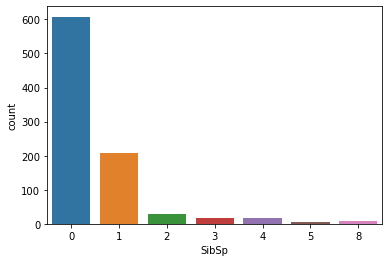

In [19]:
sns.countplot(x='SibSp',data=train_df)

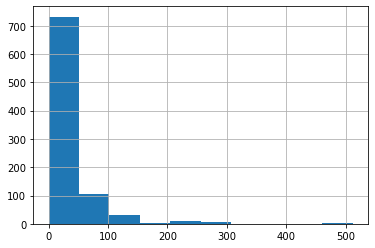

In [20]:
train_df['Fare'].hist()

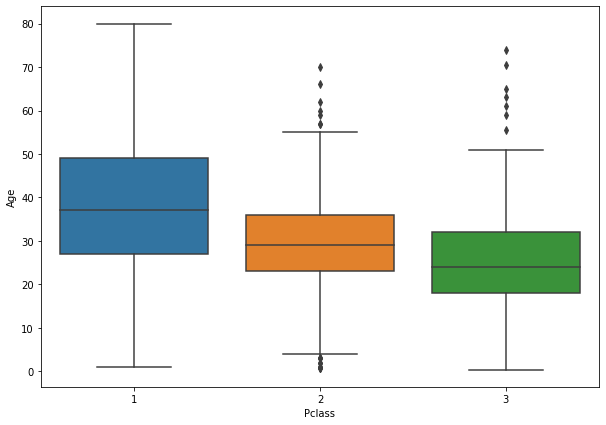

In [21]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train_df)

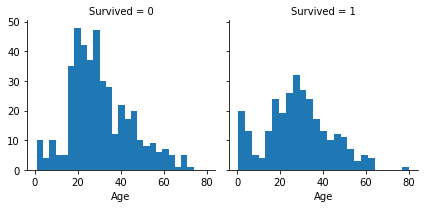

In [22]:
grid = sns.FacetGrid(train_df,col='Survived')
grid.map(plt.hist,'Age',bins=25)

Infants had high survival rate <br>
Oldest passengers (Age = 80) survived <br>
Large number of 15-25 year olds did not survive <br>
Most passengers are in 15-35 age range.

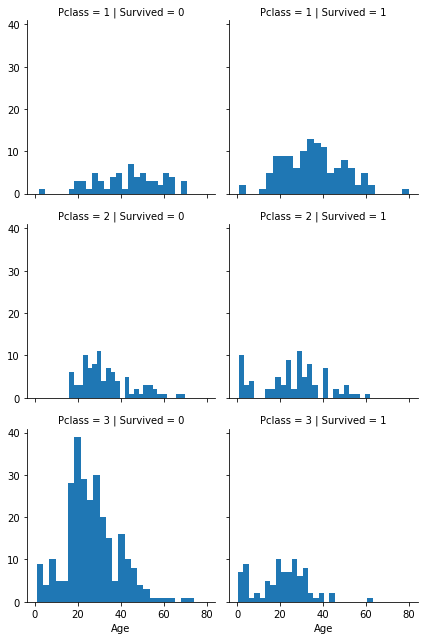

In [23]:
grid = sns.FacetGrid(train_df,col='Survived',row='Pclass')
grid.map(plt.hist,'Age',bins=25)

Pclass=3 had most passengers but most did not survive<br>
Infant passengers in Pclass=2 and Pclass=3 mostly survived<br>
Most passengers in Pclass=1 survived<br>
Pclass varies in terms of Age distribution of passengers.

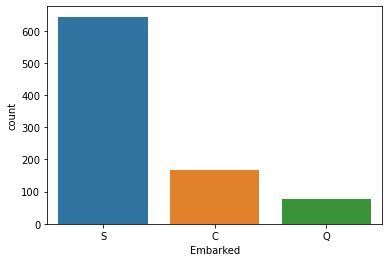

In [24]:
sns.countplot(data=train_df,x='Embarked')

C:\Users\Abhiram\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Abhiram\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Abhiram\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


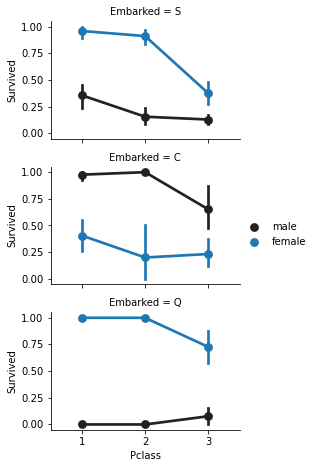

In [25]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend()

Female passengers had much better survival rate than males<br>
Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived.<br>
Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports<br>
Ports of embarkation have varying survival rates

C:\Users\Abhiram\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x000001EFB9CFD9A0>>

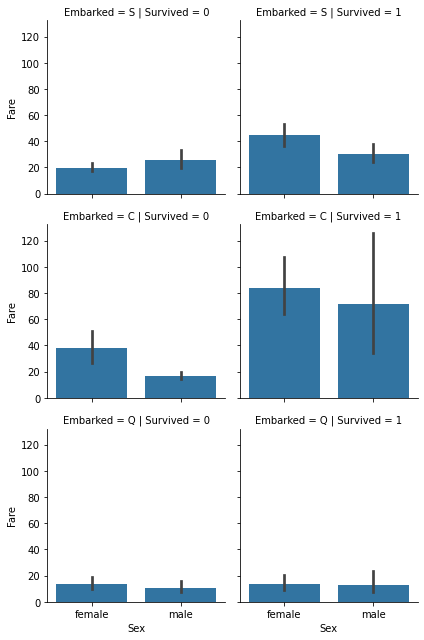

In [26]:
grid = sns.FacetGrid(train_df,col='Survived',row='Embarked')
grid.map(sns.barplot,'Sex','Fare')
grid.add_legend

Higher fare paying passengers had better survival<br> 
Port of embarkation correlates with survival rates

#### Correcting by dropping
We will drop the Cabin and Ticket features

In [27]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
test_train_df = [train_df,test_df]

#### Creating new feature from exisiting

We will extract the title from the name feature using regex expression (\w+\.)

In [28]:
for dataset in test_train_df:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [29]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We replace the uncommon titles as rare

In [30]:
for dataset in test_train_df:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [31]:
train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Converting categorical titles to ordinal

In [32]:
for dataset in test_train_df:
    dataset['Title'] = dataset['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
    dataset['Title'] = dataset['Title'].fillna(0)

In [33]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Now we can drop PassengerId and Name feature from both the datasets

In [34]:
train_df = train_df.drop(['Name','PassengerId'],axis=1)
test_df = test_df.drop(['Name'],axis=1)
test_train_df = [train_df,test_df]

In [35]:
for dataset in test_train_df:
    dataset['Sex'] = pd.get_dummies(dataset['Sex'],drop_first=True)

In [36]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,1
1,1,1,0,38.0,1,0,71.2833,C,3
2,1,3,0,26.0,0,0,7.9250,S,2
3,1,1,0,35.0,1,0,53.1000,S,3
4,0,3,1,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,5
887,1,1,0,19.0,0,0,30.0000,S,2
888,0,3,0,NaN,1,2,23.4500,S,2
889,1,1,1,26.0,0,0,30.0000,C,1


In [37]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [38]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           0
dtype: int64

Completing the embarked feature (S,Q,C) which has two missinf values with most common occurrence

In [39]:
port_freq = train_df.Embarked.dropna().mode()[0]

In [40]:
port_freq

'S'

In [41]:
for dataset in test_train_df:
    dataset['Embarked'] = dataset['Embarked'].fillna(port_freq)

In [42]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


#### Converting categorical feature to numeric
We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [43]:
for dataset in test_train_df:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [44]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,1,3
2,1,3,0,26.0,0,0,7.9250,0,2
3,1,1,0,35.0,1,0,53.1000,0,3
4,0,3,1,35.0,0,0,8.0500,0,1


#### Creating new feature usinf the existing ones
We can create a new feature for FamilySize which combines Parch and SibSp. Then we can drop Parch and SibSp from our datasets.

In [45]:
for dataset in test_train_df:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone

In [46]:
for dataset in test_train_df:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [47]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_train_df = [train_df,test_df]

In [48]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,1,22.0,7.2500,0,1,0
1,1,1,0,38.0,71.2833,1,3,0
2,1,3,0,26.0,7.9250,0,2,1
3,1,1,0,35.0,53.1000,0,3,0
4,0,3,1,35.0,8.0500,0,1,1


In [49]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
Fare            1
Embarked        0
Title           0
IsAlone         0
dtype: int64

In [50]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      0
Title         0
IsAlone       0
dtype: int64

In [51]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

In [52]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
Fare            0
Embarked        0
Title           0
IsAlone         0
dtype: int64

In [53]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      0
Title         0
IsAlone       0
dtype: int64

#### Now we have to complete the Age feature which has many missing values in both train and test data

Three ways we can fill it

1. A simple way is to generate random numbers between mean and standard deviation.

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

In [54]:
train_df['Age'].mean()

29.69911764705882

In [55]:
train_df['Age'].std()

14.526497332334044

In [56]:
import random
for i in range(87):
    print(random.normalvariate(29.69911764705882,14.526497332334044))

18.957246526169413
43.555006560363324
49.09946782318448
32.38713384153601
-17.850434293781476
42.02006195741606
11.068830382377573
19.88582675755626
58.82271127726368
48.65955538105636
27.304300513069467
25.788789423497885
10.494514479983206
52.54860915454413
50.20407104525782
43.37237956999048
26.09510224815213
20.017567730402483
17.409970333242015
10.571987894663195
17.40152536762666
13.868807348079933
45.50739609667025
35.09195514281974
27.406002600240374
-4.585450142167986
10.504961468016269
48.67086631254902
77.3401172640117
15.246247256499924
49.6119336858459
33.401945992649765
26.18032436840409
43.73628824984107
24.891849323076304
9.73958759416545
35.34826261557254
31.594616009683826
30.216604796164766
13.793603984725287
37.417725438207974
44.37794148390656
37.621274195834445
12.656105115953363
28.998614395647188
30.4023352717321
20.107320638162403
35.63999207641122
38.725185315519106
24.779977046380957
-6.812224033904698
32.0279110345328
12.04460633891669
38.92499057957488
21.0

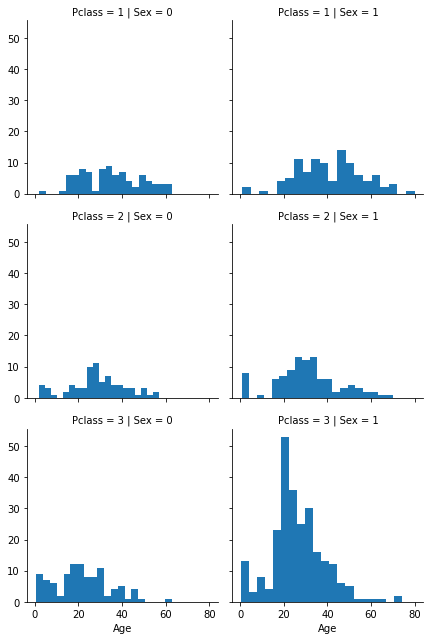

In [57]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex')
grid.map(plt.hist,'Age',bins=20)
grid.add_legend()

We will use method two(2.)

In [58]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [59]:
train_df["Age"].fillna(train_df.groupby("Title")["Age"].transform("median"), inplace=True)
test_df["Age"].fillna(test_df.groupby("Title")["Age"].transform("median"), inplace=True)

In [60]:
test_train_df = [train_df,test_df]

In [61]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Title       0
IsAlone     0
dtype: int64

In [62]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
IsAlone        0
dtype: int64

In [63]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,1,22.0,7.2500,0,1,0
1,1,1,0,38.0,71.2833,1,3,0
2,1,3,0,26.0,7.9250,0,2,1
3,1,1,0,35.0,53.1000,0,3,0
4,0,3,1,35.0,8.0500,0,1,1


In [64]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,1,34.5,7.8292,2,1,1
1,893,3,0,47.0,7.0000,0,3,0
2,894,2,1,62.0,9.6875,2,1,1
3,895,3,1,27.0,8.6625,0,1,1
4,896,3,0,22.0,12.2875,0,3,0


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [66]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [67]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Survived',axis=1), 
                                                    train_df['Survived'], test_size=0.25, 
                                                    random_state=42)

In [74]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log


C:\Users\Abhiram\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


81.14

In [75]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

66.77

In [91]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

82.49

In [78]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train,y_train) * 100, 2)
acc_gaussian

77.99

In [79]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron


65.27

In [80]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

C:\Users\Abhiram\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


50.45

In [81]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

61.83

In [95]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

98.05

In [98]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

98.05

In [85]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [99]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       134
           1       0.76      0.78      0.77        89

    accuracy                           0.81       223
   macro avg       0.80      0.81      0.80       223
weighted avg       0.81      0.81      0.81       223



In [100]:
print(confusion_matrix(y_test,Y_pred))

[[112  22]
 [ 20  69]]


In [101]:
from sklearn.model_selection import cross_val_score

In [104]:
#I usually use Naive Bayes as a baseline for my classification tasks 
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75373134 0.84328358 0.70149254 0.7443609  0.78947368]
0.7664684098305464


In [105]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81343284 0.85820896 0.7238806  0.7593985  0.84962406]
0.8009089888901357


In [108]:
from sklearn import tree

In [109]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76119403 0.78358209 0.73134328 0.78195489 0.78195489]
0.768005835484233


In [110]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.68656716 0.71641791 0.68656716 0.73684211 0.71428571]
0.7081360116709685


In [111]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.7761194  0.79850746 0.78358209 0.83458647 0.81203008]
0.8009650993154528
